In [1]:
import datetime
import numpy as np
import pandas as pd
from pydmd import HODMD
from pydmd.preprocessing import hankel_preprocessing
from matplotlib import pyplot as plt
from src.datasource import YahooDataSource
from src.prediction import PredictionModeling
from src.bayesianopt import bayesianOpt
from src.utils import buy_signal_plots,trade_strategy
from src.utils import find_cointegrated_pairs,get_top_k_pairs,get_cointergrated_coeff
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Data Extraction

In [2]:
# Extract the Data from the Yahoo Data Source
start_date = datetime.datetime(2017, 3, 29)
end_date = datetime.datetime(2024, 3, 29)
tickers  =  ['IWV', 'VT', 'VTI','ADBE','MSFT','VFH',
                 'DIA', 'RSP', 'IOO', 'IVV', 'SPY',
                 'SHE', 'IWM', 'OEF', 'QQQ',
                 'CVY', 'RPG', 'RPV', 'IWB', 'IWF', 
                 'IWD', 'IVW', 'IVE', 'PKW', 
                 'PRF', 'SDY', 'VV', 'VUG', 
                 'VTV', 'MGC', 'MGK', 'MGV', 'VIG', 
                 'VYM', 'DTN', 'DLN', 'MDY', 'DVY', 
                 'IWR', 'IWP', 'IWS', 'IJH', 'IJK', 
                 'IJJ', 'PDP', 'DON', 'IWC', 'IWM', 
                 'EWT', 'EPI', 'XLY', 'IYC', 'ITB', 
                 'XHB', 'VCR','XLP', 'IYK', 'VDC', 
                 'XLE', 'IYE', 'IGE', 'OIH', 'XOP', 
                 'VDE', 'QCLN', 'XLF','IYF', 'KBE', 
                 'KRE']
columns =   ["High","Close","Low","Volume"]
ds = YahooDataSource(start_date,end_date,tickers,columns)

Fetching data for 69 symbols from 2017-03-29 00:00:00 to 2024-03-29 00:00:00
Fetching data for IWV (1/69)...


[history.py:203 -              history() ] IWV: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IWV


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IWV?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IWV&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IWV
Fetching data for VT (2/69)...


[history.py:203 -              history() ] VT: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for VT


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VT&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for VT
Fetching data for VTI (3/69)...


[history.py:203 -              history() ] VTI: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for VTI


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VTI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VTI&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for VTI
Fetching data for ADBE (4/69)...


[history.py:203 -              history() ] ADBE: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for ADBE


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ADBE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ADBE&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for ADBE
Fetching data for MSFT (5/69)...


[history.py:203 -              history() ] MSFT: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for MSFT


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MSFT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MSFT&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for MSFT
Fetching data for VFH (6/69)...


[history.py:203 -              history() ] VFH: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for VFH


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VFH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VFH&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for VFH
Fetching data for DIA (7/69)...


[history.py:203 -              history() ] DIA: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for DIA


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DIA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DIA&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for DIA
Fetching data for RSP (8/69)...


[history.py:203 -              history() ] RSP: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for RSP


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RSP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RSP&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for RSP
Fetching data for IOO (9/69)...


[history.py:203 -              history() ] IOO: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IOO


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IOO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IOO&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IOO
Fetching data for IVV (10/69)...


[history.py:203 -              history() ] IVV: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IVV


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IVV?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IVV&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IVV
Fetching data for SPY (11/69)...


[history.py:203 -              history() ] SPY: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for SPY


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SPY?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SPY&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for SPY
Fetching data for SHE (12/69)...


[history.py:203 -              history() ] SHE: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for SHE


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SHE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SHE&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for SHE
Fetching data for IWM (13/69)...


[history.py:203 -              history() ] IWM: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IWM


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IWM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IWM&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IWM
Fetching data for OEF (14/69)...


[history.py:203 -              history() ] OEF: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for OEF


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/OEF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=OEF&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for OEF
Fetching data for QQQ (15/69)...


[history.py:203 -              history() ] QQQ: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for QQQ


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/QQQ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=QQQ&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for QQQ
Fetching data for CVY (16/69)...


[history.py:203 -              history() ] CVY: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for CVY


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CVY?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CVY&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for CVY
Fetching data for RPG (17/69)...


[history.py:203 -              history() ] RPG: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for RPG


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RPG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RPG&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for RPG
Fetching data for RPV (18/69)...


[history.py:203 -              history() ] RPV: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for RPV


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RPV?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RPV&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for RPV
Fetching data for IWB (19/69)...


[history.py:203 -              history() ] IWB: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IWB


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IWB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IWB&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IWB
Fetching data for IWF (20/69)...


[history.py:203 -              history() ] IWF: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IWF


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IWF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IWF&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IWF
Fetching data for IWD (21/69)...


[history.py:203 -              history() ] IWD: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IWD


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IWD?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IWD&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IWD
Fetching data for IVW (22/69)...


[history.py:203 -              history() ] IVW: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IVW


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IVW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IVW&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IVW
Fetching data for IVE (23/69)...


[history.py:203 -              history() ] IVE: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IVE


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IVE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IVE&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IVE
Fetching data for PKW (24/69)...


[history.py:203 -              history() ] PKW: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for PKW


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PKW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PKW&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for PKW
Fetching data for PRF (25/69)...


[history.py:203 -              history() ] PRF: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for PRF


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PRF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PRF&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for PRF
Fetching data for SDY (26/69)...


[history.py:203 -              history() ] SDY: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for SDY


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SDY?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SDY&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for SDY
Fetching data for VV (27/69)...


[history.py:203 -              history() ] VV: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for VV


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VV?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VV&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for VV
Fetching data for VUG (28/69)...


[history.py:203 -              history() ] VUG: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for VUG


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VUG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VUG&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for VUG
Fetching data for VTV (29/69)...


[history.py:203 -              history() ] VTV: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for VTV


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VTV?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VTV&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for VTV
Fetching data for MGC (30/69)...


[history.py:203 -              history() ] MGC: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for MGC


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MGC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MGC&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for MGC
Fetching data for MGK (31/69)...


[history.py:203 -              history() ] MGK: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for MGK


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MGK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MGK&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for MGK
Fetching data for MGV (32/69)...


[history.py:203 -              history() ] MGV: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for MGV


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MGV?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MGV&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for MGV
Fetching data for VIG (33/69)...


[history.py:203 -              history() ] VIG: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for VIG


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VIG?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VIG&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for VIG
Fetching data for VYM (34/69)...


[history.py:203 -              history() ] VYM: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for VYM


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VYM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VYM&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for VYM
Fetching data for DTN (35/69)...


[history.py:203 -              history() ] DTN: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for DTN


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DTN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DTN&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for DTN
Fetching data for DLN (36/69)...


[history.py:203 -              history() ] DLN: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for DLN


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DLN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DLN&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for DLN
Fetching data for MDY (37/69)...


[history.py:203 -              history() ] MDY: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for MDY


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MDY?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MDY&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for MDY
Fetching data for DVY (38/69)...


[history.py:203 -              history() ] DVY: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for DVY


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DVY?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DVY&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for DVY
Fetching data for IWR (39/69)...


[history.py:203 -              history() ] IWR: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IWR


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IWR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IWR&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IWR
Fetching data for IWP (40/69)...


[history.py:203 -              history() ] IWP: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IWP


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IWP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IWP&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IWP
Fetching data for IWS (41/69)...


[history.py:203 -              history() ] IWS: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IWS


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IWS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IWS&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IWS
Fetching data for IJH (42/69)...


[history.py:203 -              history() ] IJH: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IJH


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IJH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IJH&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IJH
Fetching data for IJK (43/69)...


[history.py:203 -              history() ] IJK: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IJK


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IJK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IJK&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IJK
Fetching data for IJJ (44/69)...


[history.py:203 -              history() ] IJJ: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IJJ


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IJJ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IJJ&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IJJ
Fetching data for PDP (45/69)...


[history.py:203 -              history() ] PDP: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for PDP


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PDP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PDP&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for PDP
Fetching data for DON (46/69)...


[history.py:203 -              history() ] DON: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for DON


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DON?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DON&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for DON
Fetching data for IWC (47/69)...


[history.py:203 -              history() ] IWC: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IWC


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IWC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IWC&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IWC
Fetching data for IWM (48/69)...


[history.py:203 -              history() ] IWM: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IWM


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IWM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IWM&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IWM
Fetching data for EWT (49/69)...


[history.py:203 -              history() ] EWT: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for EWT


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EWT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EWT&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for EWT
Fetching data for EPI (50/69)...


[history.py:203 -              history() ] EPI: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for EPI


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EPI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=EPI&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for EPI
Fetching data for XLY (51/69)...


[history.py:203 -              history() ] XLY: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for XLY


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/XLY?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=XLY&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for XLY
Fetching data for IYC (52/69)...


[history.py:203 -              history() ] IYC: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IYC


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IYC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IYC&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IYC
Fetching data for ITB (53/69)...


[history.py:203 -              history() ] ITB: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for ITB


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ITB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ITB&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for ITB
Fetching data for XHB (54/69)...


[history.py:203 -              history() ] XHB: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for XHB


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/XHB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=XHB&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for XHB
Fetching data for VCR (55/69)...


[history.py:203 -              history() ] VCR: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for VCR


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VCR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VCR&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for VCR
Fetching data for XLP (56/69)...


[history.py:203 -              history() ] XLP: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for XLP


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/XLP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=XLP&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for XLP
Fetching data for IYK (57/69)...


[history.py:203 -              history() ] IYK: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IYK


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IYK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IYK&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IYK
Fetching data for VDC (58/69)...


[history.py:203 -              history() ] VDC: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for VDC


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VDC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VDC&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for VDC
Fetching data for XLE (59/69)...


[history.py:203 -              history() ] XLE: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for XLE


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/XLE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=XLE&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for XLE
Fetching data for IYE (60/69)...


[history.py:203 -              history() ] IYE: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IYE


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IYE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IYE&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IYE
Fetching data for IGE (61/69)...


[history.py:203 -              history() ] IGE: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IGE


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IGE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IGE&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IGE
Fetching data for OIH (62/69)...


[history.py:203 -              history() ] OIH: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for OIH


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/OIH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=OIH&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for OIH
Fetching data for XOP (63/69)...


[history.py:203 -              history() ] XOP: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for XOP


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/XOP?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=XOP&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for XOP
Fetching data for VDE (64/69)...


[history.py:203 -              history() ] VDE: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for VDE


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VDE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VDE&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for VDE
Fetching data for QCLN (65/69)...


[history.py:203 -              history() ] QCLN: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for QCLN


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/QCLN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=QCLN&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for QCLN
Fetching data for XLF (66/69)...


[history.py:203 -              history() ] XLF: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for XLF


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/XLF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=XLF&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for XLF
Fetching data for IYF (67/69)...


[history.py:203 -              history() ] IYF: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for IYF


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IYF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=IYF&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for IYF
Fetching data for KBE (68/69)...


[history.py:203 -              history() ] KBE: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for KBE


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/KBE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=KBE&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for KBE
Fetching data for KRE (69/69)...


[history.py:203 -              history() ] KRE: No price data found, symbol may be delisted (1d 2017-03-29 -> 2024-03-29)


  No data returned for KRE


[quote.py:626 -               _fetch() ] 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/KRE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=KRE&crumb=Edge%3A+Too+Many+Requests


  Could not retrieve ticker info for KRE

Failed to fetch data for 69 symbols: ['IWV', 'VT', 'VTI', 'ADBE', 'MSFT', 'VFH', 'DIA', 'RSP', 'IOO', 'IVV', 'SPY', 'SHE', 'IWM', 'OEF', 'QQQ', 'CVY', 'RPG', 'RPV', 'IWB', 'IWF', 'IWD', 'IVW', 'IVE', 'PKW', 'PRF', 'SDY', 'VV', 'VUG', 'VTV', 'MGC', 'MGK', 'MGV', 'VIG', 'VYM', 'DTN', 'DLN', 'MDY', 'DVY', 'IWR', 'IWP', 'IWS', 'IJH', 'IJK', 'IJJ', 'PDP', 'DON', 'IWC', 'IWM', 'EWT', 'EPI', 'XLY', 'IYC', 'ITB', 'XHB', 'VCR', 'XLP', 'IYK', 'VDC', 'XLE', 'IYE', 'IGE', 'OIH', 'XOP', 'VDE', 'QCLN', 'XLF', 'IYF', 'KBE', 'KRE']

Successfully fetched data for 0 symbols


In [11]:
# Get only Close column data
df_pair_search = ds.get_data_by_column_tickers(columns=["Close"],tickers=-1)

In [12]:
df_pair_search.head(n=5)
scores, pvalues, pairs = find_cointegrated_pairs(df_pair_search)

top_pairs = get_top_k_pairs(pairs,5)
print("Top pairs",top_pairs)

# Get first pair
tickers = ds.get_tickers(top_pairs[0][0])
print("Top ticker",tickers)

Top pairs [(('IWD_Close', 'PKW_Close'), 0.0022044500292948445), (('DTN_Close', 'XLF_Close'), 0.0022148809567045613), (('DTN_Close', 'EPI_Close'), 0.0028136513732692813), (('DTN_Close', 'RPV_Close'), 0.005354726488234323), (('VT_Close', 'IJK_Close'), 0.008920332048855017)]
Top ticker ['IWD', 'PKW']


In [13]:
first_series = 'IWD_Close'
second_series =  'PKW_Close'

In [14]:
# Gather High, Low ,Close , Volume of selected stocks
columns = ["High","Close","Low","Volume"]
df_raw = ds.get_data_by_column_tickers(columns=columns,tickers=tickers)

In [15]:
df_raw

,IWD_Close,IWD_High,IWD_Volume,IWD_Low,PKW_Close,PKW_High,PKW_Volume,PKW_Low
0,98.042839,98.205220,1465100,97.641163,47.299152,47.390660,47200,47.207648
1,98.512901,98.624007,1779000,97.906117,47.692635,47.710936,42800,47.290012
2,98.230865,98.564170,2455400,98.179583,47.537086,47.720098,60900,47.537086
3,97.974487,98.299243,2376600,97.316427,47.290009,47.582826,86200,47.042943
4,98.136841,98.162479,1315700,97.683889,47.189350,47.280854,66700,47.106995
...,...,...,...,...,...,...,...,...
1757,175.990005,177.300003,1125200,175.949997,106.610001,107.220001,21100,106.559998
1758,175.779999,176.559998,2038600,175.750000,106.449997,106.849998,32200,106.440002
1759,175.649994,176.259995,1180400,175.649994,106.589996,106.769997,17900,106.510002
1760,178.539993,178.539993,2186800,176.679993,107.849998,107.849998,16900,106.919998


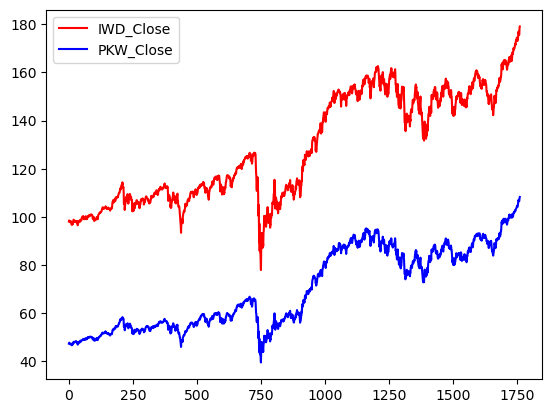

In [16]:
plt.plot(df_raw[first_series],color='r')
plt.plot(df_raw[second_series],color='b')
plt.legend([f'{first_series}',f'{second_series}'])

In [17]:
# Find ratio between co-integrated pairs
coeff = get_cointergrated_coeff(df_raw[first_series],df_raw[second_series])
print(coeff)

-1.8076315825292937


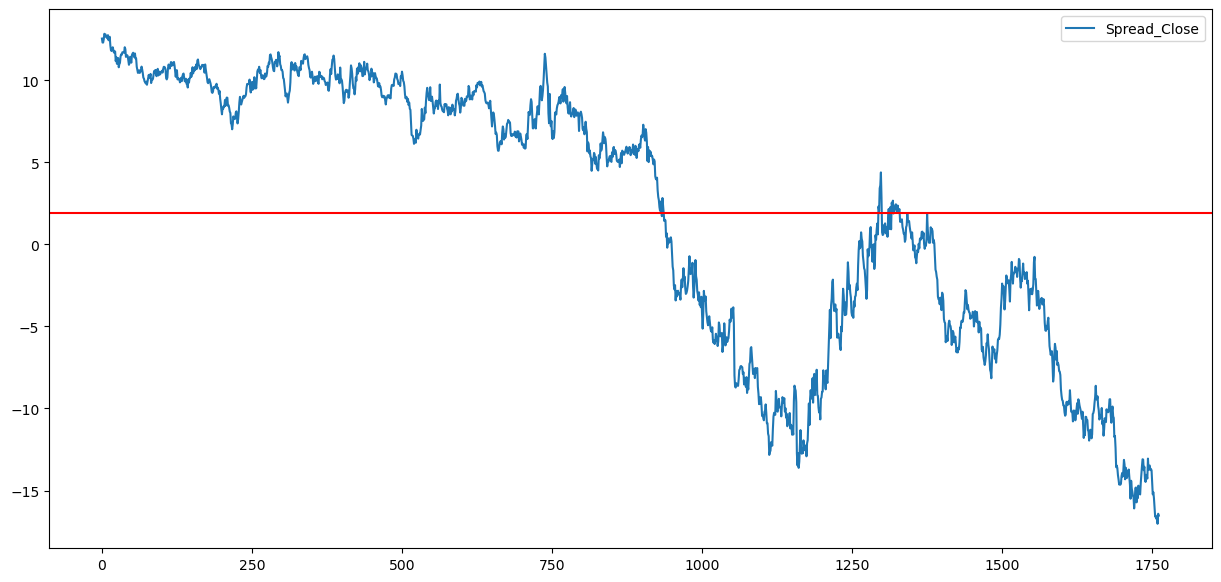

In [18]:
df_raw['Spread_Close'] = df_raw[first_series] + (df_raw[second_series] * coeff)
df_raw['Spread_Close'].plot(figsize=(15,7))
plt.axhline(df_raw['Spread_Close'].mean(),c='red')
plt.legend(['Spread_Close'])

In [19]:
pm = PredictionModeling(df_raw,"Spread_Close",0.60,1)

In [20]:
pm.add_arima_forecast("Spread_Close",order=(1,1,0))

In [21]:
pm.add_dmd_forecast("Spread_Close",svd_rank=0)

In [22]:
pm.data.head()

,IWD_Close,IWD_High,IWD_Volume,IWD_Low,PKW_Close,PKW_High,PKW_Volume,PKW_Low,Spread_Close,Spread_Close_Actual_fore_perod_1,Spread_Close_Actual_value_fore_perod_1,Spread_Close_Actual_mean_fore_perod_1,Spread_Close_ARIMA_forecast_1,Spread_Close_ARIMA_forecasts_1,Spread_Close_DMD_forecast_1,Spread_Close_DMD_forecasts_1
0,98.042839,98.205220,1465100,97.641163,47.299152,47.390660,47200,47.207648,12.543397,[12.302188780761242],12.302189,12.302189,NaN,NaN,NaN,NaN
1,98.512901,98.624007,1779000,97.906117,47.692635,47.710936,42800,47.290012,12.302189,[12.301326603519783],12.301327,12.301327,NaN,NaN,NaN,NaN
2,98.230865,98.564170,2455400,98.179583,47.537086,47.720098,60900,47.537086,12.301327,[12.49157432080655],12.491574,12.491574,NaN,NaN,NaN,NaN
3,97.974487,98.299243,2376600,97.316427,47.290009,47.582826,86200,47.042943,12.491574,[12.83588116959271],12.835881,12.835881,NaN,NaN,NaN,NaN
4,98.136841,98.162479,1315700,97.683889,47.189350,47.280854,66700,47.106995,12.835881,[12.798114738806518],12.798115,12.798115,NaN,NaN,NaN,NaN


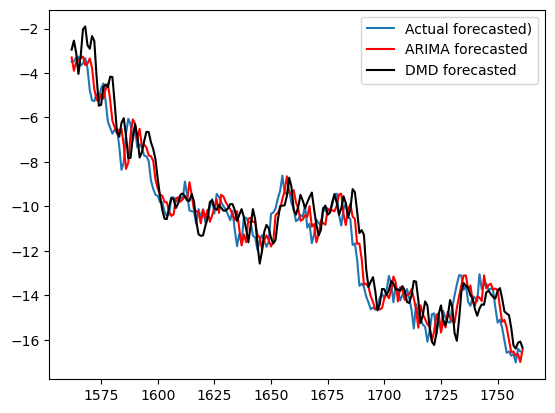

In [23]:
plt.plot(pm.data["Spread_Close_Actual_value_fore_perod_1"][-200:])
plt.plot(pm.data["Spread_Close_ARIMA_forecast_1"][-200:],color='r')
plt.plot(pm.data["Spread_Close_DMD_forecast_1"][-200:],color='k')
plt.legend(["Actual forecasted)","ARIMA forecasted","DMD forecasted"])

In [24]:
pm.data

,IWD_Close,IWD_High,IWD_Volume,IWD_Low,PKW_Close,PKW_High,PKW_Volume,PKW_Low,Spread_Close,Spread_Close_Actual_fore_perod_1,Spread_Close_Actual_value_fore_perod_1,Spread_Close_Actual_mean_fore_perod_1,Spread_Close_ARIMA_forecast_1,Spread_Close_ARIMA_forecasts_1,Spread_Close_DMD_forecast_1,Spread_Close_DMD_forecasts_1
0,98.042839,98.205220,1465100,97.641163,47.299152,47.390660,47200,47.207648,12.543397,[12.302188780761242],12.302189,12.302189,NaN,NaN,NaN,NaN
1,98.512901,98.624007,1779000,97.906117,47.692635,47.710936,42800,47.290012,12.302189,[12.301326603519783],12.301327,12.301327,NaN,NaN,NaN,NaN
2,98.230865,98.564170,2455400,98.179583,47.537086,47.720098,60900,47.537086,12.301327,[12.49157432080655],12.491574,12.491574,NaN,NaN,NaN,NaN
3,97.974487,98.299243,2376600,97.316427,47.290009,47.582826,86200,47.042943,12.491574,[12.83588116959271],12.835881,12.835881,NaN,NaN,NaN,NaN
4,98.136841,98.162479,1315700,97.683889,47.189350,47.280854,66700,47.106995,12.835881,[12.798114738806518],12.798115,12.798115,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,175.990005,177.300003,1125200,175.949997,106.610001,107.220001,21100,106.559998,-16.721599,[-16.642377664492642],-16.642378,-16.642378,-16.529959,[-16.529958879816977],-16.260204,[-16.260204326572357]
1758,175.779999,176.559998,2038600,175.750000,106.449997,106.849998,32200,106.440002,-16.642378,[-17.025449865568476],-17.025450,-17.025450,-16.712701,[-16.71270070322575],-16.401976,[-16.401976203028656]
1759,175.649994,176.259995,1180400,175.649994,106.589996,106.769997,17900,106.510002,-17.025450,[-16.413070131424604],-16.413070,-16.413070,-16.646002,[-16.64600200672323],-16.136630,[-16.136630092311904]
1760,178.539993,178.539993,2186800,176.679993,107.849998,107.849998,16900,106.919998,-16.413070,[-16.529971634893087],-16.529972,-16.529972,-17.007897,[-17.007897307821793],-16.083164,[-16.08316357763691]


In [25]:
pm.data

,IWD_Close,IWD_High,IWD_Volume,IWD_Low,PKW_Close,PKW_High,PKW_Volume,PKW_Low,Spread_Close,Spread_Close_Actual_fore_perod_1,Spread_Close_Actual_value_fore_perod_1,Spread_Close_Actual_mean_fore_perod_1,Spread_Close_ARIMA_forecast_1,Spread_Close_ARIMA_forecasts_1,Spread_Close_DMD_forecast_1,Spread_Close_DMD_forecasts_1
0,98.042839,98.205220,1465100,97.641163,47.299152,47.390660,47200,47.207648,12.543397,[12.302188780761242],12.302189,12.302189,NaN,NaN,NaN,NaN
1,98.512901,98.624007,1779000,97.906117,47.692635,47.710936,42800,47.290012,12.302189,[12.301326603519783],12.301327,12.301327,NaN,NaN,NaN,NaN
2,98.230865,98.564170,2455400,98.179583,47.537086,47.720098,60900,47.537086,12.301327,[12.49157432080655],12.491574,12.491574,NaN,NaN,NaN,NaN
3,97.974487,98.299243,2376600,97.316427,47.290009,47.582826,86200,47.042943,12.491574,[12.83588116959271],12.835881,12.835881,NaN,NaN,NaN,NaN
4,98.136841,98.162479,1315700,97.683889,47.189350,47.280854,66700,47.106995,12.835881,[12.798114738806518],12.798115,12.798115,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,175.990005,177.300003,1125200,175.949997,106.610001,107.220001,21100,106.559998,-16.721599,[-16.642377664492642],-16.642378,-16.642378,-16.529959,[-16.529958879816977],-16.260204,[-16.260204326572357]
1758,175.779999,176.559998,2038600,175.750000,106.449997,106.849998,32200,106.440002,-16.642378,[-17.025449865568476],-17.025450,-17.025450,-16.712701,[-16.71270070322575],-16.401976,[-16.401976203028656]
1759,175.649994,176.259995,1180400,175.649994,106.589996,106.769997,17900,106.510002,-17.025450,[-16.413070131424604],-16.413070,-16.413070,-16.646002,[-16.64600200672323],-16.136630,[-16.136630092311904]
1760,178.539993,178.539993,2186800,176.679993,107.849998,107.849998,16900,106.919998,-16.413070,[-16.529971634893087],-16.529972,-16.529972,-17.007897,[-17.007897307821793],-16.083164,[-16.08316357763691]


In [42]:
pm.train_end_index

704

In [43]:
# MSE
df = pd.DataFrame(pm.data[704:-1])
from sklearn.metrics import mean_squared_error

mse_arima = mean_squared_error(df['Spread_Close_Actual_value_fore_perod_1'], df['Spread_Close_ARIMA_forecast_1'])
mse_dmd = mean_squared_error(df['Spread_Close_Actual_value_fore_perod_1'], df['Spread_Close_DMD_forecast_1'])

print(f"MSE for ARIMA: {mse_arima}")
print(f"MSE for DMD: {mse_dmd}")

MSE for ARIMA: 0.6579207010948696
MSE for DMD: 1.5353994500179577


In [44]:
#directional accuracy
from sklearn.metrics import classification_report
df['direction_Actual'] = df['Spread_Close_Actual_value_fore_perod_1'] - df['Spread_Close']
df['direction_DMD'] = df['Spread_Close_DMD_forecast_1'] - df['Spread_Close']
df['direction_ARIMA'] = df['Spread_Close_ARIMA_forecast_1'] - df['Spread_Close']
df['direction_Actual'] = np.where(df['direction_Actual'] > 0, 1, -1)
df['direction_DMD'] = np.where(df['direction_DMD'] > 0, 1, -1)
df['direction_ARIMA'] = np.where(df['direction_ARIMA'] > 0, 1, -1)
print("Classification Report for DMD Model:")
print(classification_report(df['direction_Actual'], df['direction_DMD'], target_names=['Decrease', 'Increase']))
print("Classification Report for ARIMA Model:")
print(classification_report(df['direction_Actual'], df['direction_ARIMA'], target_names=['Decrease', 'Increase']))

Classification Report for DMD Model:
              precision    recall  f1-score   support

    Decrease       0.56      0.49      0.52       554
    Increase       0.51      0.58      0.54       503

    accuracy                           0.53      1057
   macro avg       0.53      0.53      0.53      1057
weighted avg       0.54      0.53      0.53      1057

Classification Report for ARIMA Model:
              precision    recall  f1-score   support

    Decrease       0.56      0.51      0.54       554
    Increase       0.51      0.56      0.54       503

    accuracy                           0.54      1057
   macro avg       0.54      0.54      0.54      1057
weighted avg       0.54      0.54      0.54      1057



In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

# 计算方向变化
df['Actual_Direction'] = np.where(df['Spread_Close_Actual_value_fore_perod_1'] > df['Spread_Close'], 1, -1)
df['DMD_Direction'] = np.where(df['Spread_Close_DMD_forecast_1'] > df['Spread_Close'], 1, -1)
df['ARIMA_Direction'] = np.where(df['Spread_Close_ARIMA_forecast_1'] > df['Spread_Close'], 1, -1)
# 生成 DMD 模型的分类报告
report_dmd = classification_report(df['Actual_Direction'], df['DMD_Direction'], target_names=['Decrease', 'Increase'])
print("Classification Report for DMD Model:")
print(report_dmd)

# 生成 ARIMA 模型的分类报告
report_arima = classification_report(df['Actual_Direction'], df['ARIMA_Direction'], target_names=['Decrease', 'Increase'])
print("Classification Report for ARIMA Model:")
print(report_arima)


Classification Report for DMD Model:
              precision    recall  f1-score   support

    Decrease       0.56      0.49      0.52       554
    Increase       0.51      0.58      0.54       503

    accuracy                           0.53      1057
   macro avg       0.53      0.53      0.53      1057
weighted avg       0.54      0.53      0.53      1057

Classification Report for ARIMA Model:
              precision    recall  f1-score   support

    Decrease       0.56      0.51      0.54       554
    Increase       0.51      0.56      0.54       503

    accuracy                           0.54      1057
   macro avg       0.54      0.54      0.54      1057
weighted avg       0.54      0.54      0.54      1057



# Data Prepareation of Hyperparameter Tuning for Trading Strategy

In [26]:
total_length =(len(pm.data) - pm.train_end_index)-1
train_size = 0.60
length_param_training = int((len(pm.data) - pm.train_end_index)*0.60)

In [27]:
test_data = pm.data[[first_series,second_series,"Spread_Close","Spread_Close_Actual_value_fore_perod_1","Spread_Close_ARIMA_forecast_1","Spread_Close_DMD_forecast_1"]][total_length:-1]

In [28]:
spread_actual_val = test_data["Spread_Close_Actual_value_fore_perod_1"][:length_param_training]
spread_naive_val= test_data["Spread_Close"][:length_param_training]
spread_ARIMA_val = test_data["Spread_Close_ARIMA_forecast_1"][:length_param_training]
spread_DMD_val = test_data["Spread_Close_DMD_forecast_1"][:length_param_training]
S1_val = test_data[first_series][:length_param_training]
S2_val = test_data[second_series][:length_param_training]
spread_actual_test = test_data["Spread_Close_Actual_value_fore_perod_1"][length_param_training:]
spread_naive_test= test_data["Spread_Close"][length_param_training:]
spread_ARIMA_test = test_data["Spread_Close_ARIMA_forecast_1"][length_param_training:]
spread_DMD_test = test_data["Spread_Close_DMD_forecast_1"][length_param_training:]
S1_test = test_data[first_series][length_param_training:]
S2_test = test_data[second_series][length_param_training:]

# Define set of Hyper parameters

In [29]:
sell_treshold_params = np.linspace(0.5,1,20)
buy_threshold_params = np.linspace(-0.5,-1,20)
clear_threshold_params = np.linspace(0,0.5,10)
window1_param = np.arange(10,100,2)
window2_param = np.arange(1,7,1)
window_param = list(zip(window1_param,window2_param))

param_grid = { 'window1':window1_param,
              'window2':window2_param,
              "sell_threshold":sell_treshold_params,
              "buy_threshold":buy_threshold_params,
              "clear_threshold":clear_threshold_params }
config_dict = {"num_iteration":150}

#  Trading Strategy using Actual Spread (Forecasted) 

  0%|          | 0/150 [00:00<?, ?it/s]

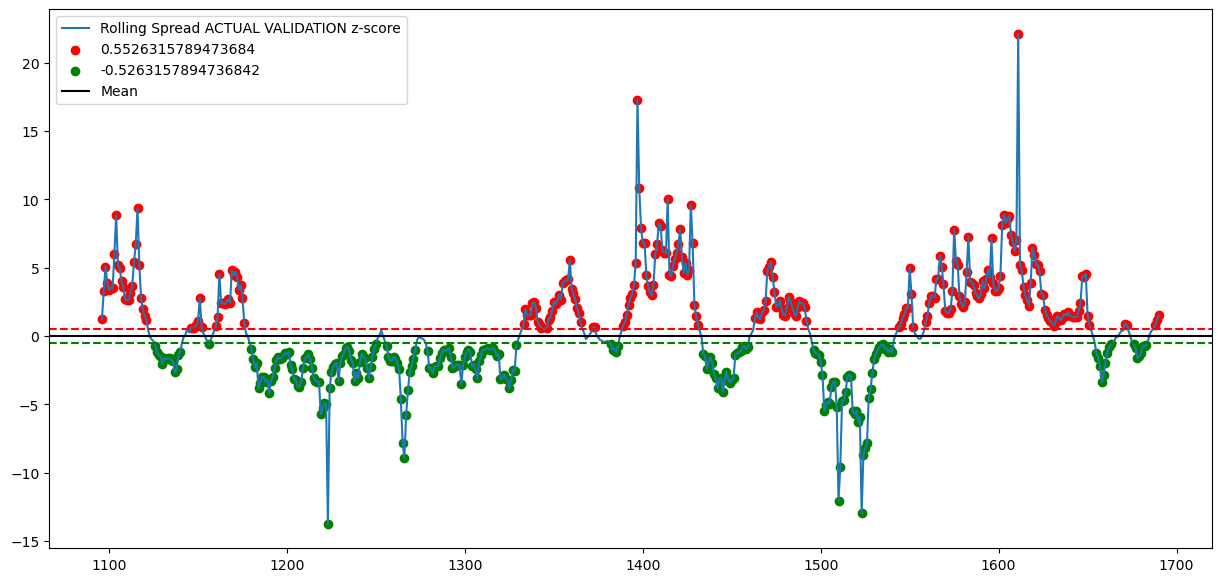

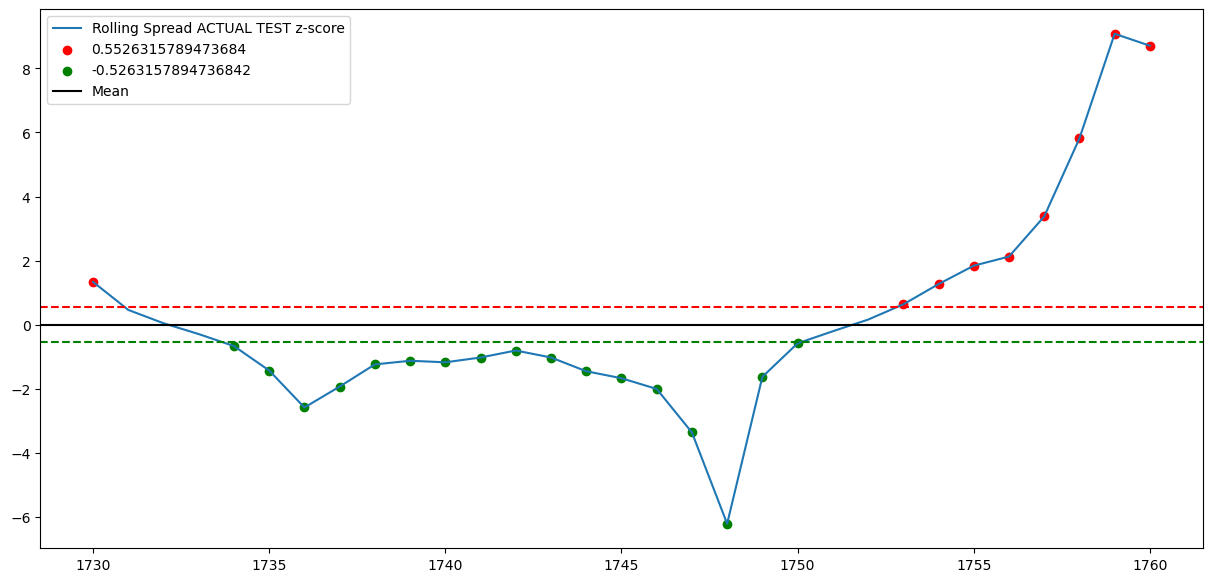

Optimal Parameters {'buy_threshold': -0.5263157894736842, 'clear_threshold': 0.1111111111111111, 'sell_threshold': 0.5526315789473684, 'window1': 40, 'window2': 6}
Money on validation data 8447.971373215201
Money on test data 1166.9295038182445


In [30]:
# Optimize the Parameters using Validation data
byopt = bayesianOpt()
params = byopt.optimize(spread_actual_val,S1_val,S2_val,param_grid,config_dict)

window1 = byopt.optimize_results["best_params"]["window1"]
window2 = byopt.optimize_results["best_params"]["window2"]
sell_threshold = byopt.optimize_results["best_params"]["sell_threshold"]
buy_threshold = byopt.optimize_results["best_params"]["buy_threshold"]
clear_threshold = byopt.optimize_results["best_params"]["clear_threshold"]


buy_signal_plots(spread_actual_val,S1_val,S2_val,window1,window2,sell_threshold,buy_threshold,label="ACTUAL VALIDATION")
buy_signal_plots(spread_actual_test,S1_test,S2_test,window1,window2,sell_threshold,buy_threshold,label="ACTUAL TEST")

money_val = trade_strategy(S1_val,S2_val,spread_actual_val,window1,window2,sell_threshold,buy_threshold,clear_threshold)

# Run the algorithm on test data
money_test = trade_strategy(S1_test,S2_test,spread_actual_test,window1,window2,sell_threshold,buy_threshold,clear_threshold)

print("Optimal Parameters",byopt.optimize_results["best_params"])
print("Money on validation data",money_val)
print("Money on test data",money_test)


# Trading Strategy using Trading Strategy using Actual Spread  

  0%|          | 0/150 [00:00<?, ?it/s]

{'buy_threshold': -0.5789473684210527, 'clear_threshold': 0.16666666666666666, 'sell_threshold': 0.5263157894736842, 'window1': 26, 'window2': 6}


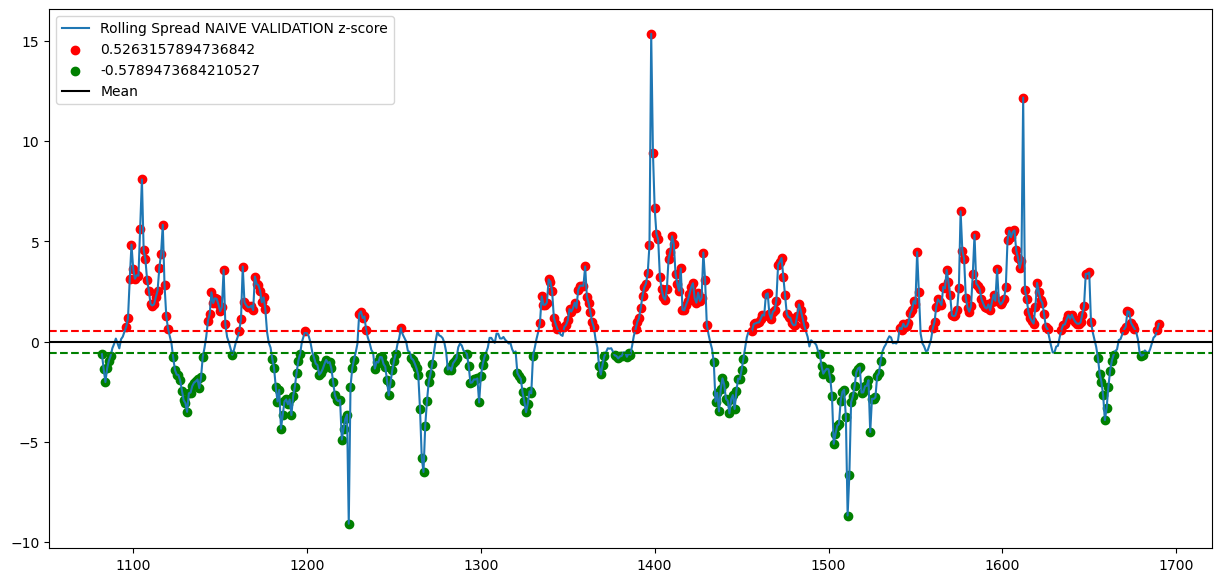

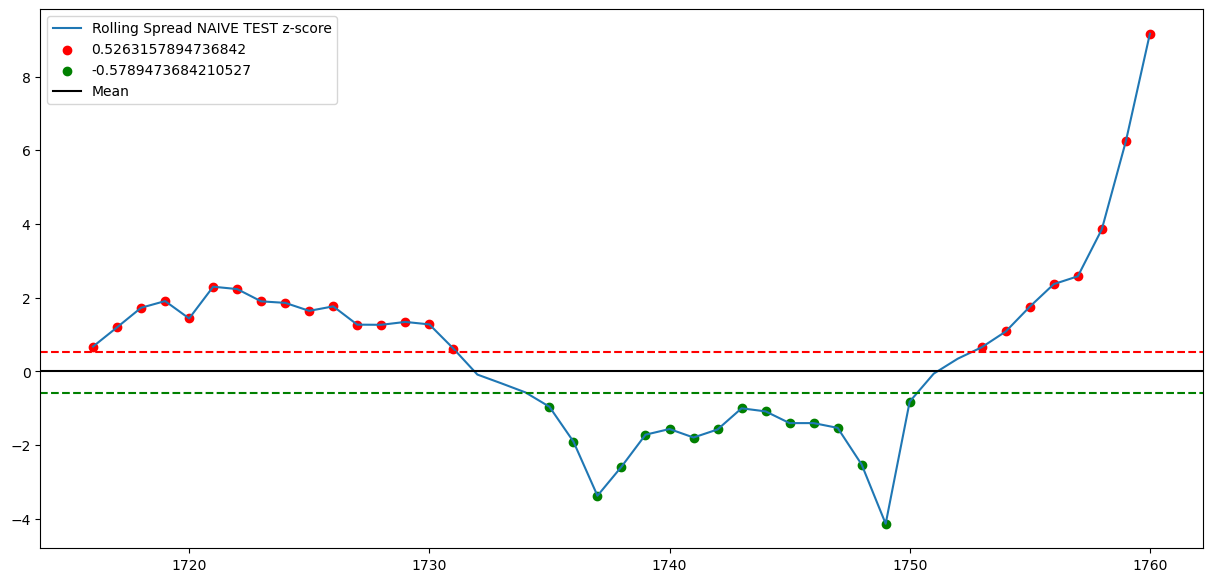

Optimal Parameters {'buy_threshold': -0.5789473684210527, 'clear_threshold': 0.16666666666666666, 'sell_threshold': 0.5263157894736842, 'window1': 26, 'window2': 6}
Money on validation data 7332.769524657295
Money on test data -77.07881543486837


In [31]:

byopt = bayesianOpt()
params = byopt.optimize(spread_naive_val,S1_val,S2_val,param_grid,config_dict)
print(byopt.optimize_results["best_params"])
window1 = byopt.optimize_results["best_params"]["window1"]
window2 = byopt.optimize_results["best_params"]["window2"]
sell_threshold = byopt.optimize_results["best_params"]["sell_threshold"]
buy_threshold = byopt.optimize_results["best_params"]["buy_threshold"]
clear_threshold = byopt.optimize_results["best_params"]["clear_threshold"]


buy_signal_plots(spread_naive_val,S1_val,S2_val,window1,window2,sell_threshold,buy_threshold,label="NAIVE VALIDATION")
buy_signal_plots(spread_naive_test,S1_test,S2_test,window1,window2,sell_threshold,buy_threshold,label="NAIVE TEST")

money_val = trade_strategy(S1_val,S2_val,spread_naive_val,window1,window2,sell_threshold,buy_threshold,clear_threshold)
money_test = trade_strategy(S1_test,S2_test,spread_naive_test,window1,window2,sell_threshold,buy_threshold,clear_threshold)

print("Optimal Parameters",byopt.optimize_results["best_params"])
print("Money on validation data",money_val)
print("Money on test data",money_test)


# Trading Strategy using Trading Strategy using ARIMA

  0%|          | 0/150 [00:00<?, ?it/s]

{'buy_threshold': -0.5, 'clear_threshold': 0.1111111111111111, 'sell_threshold': 0.6578947368421053, 'window1': 36, 'window2': 6}


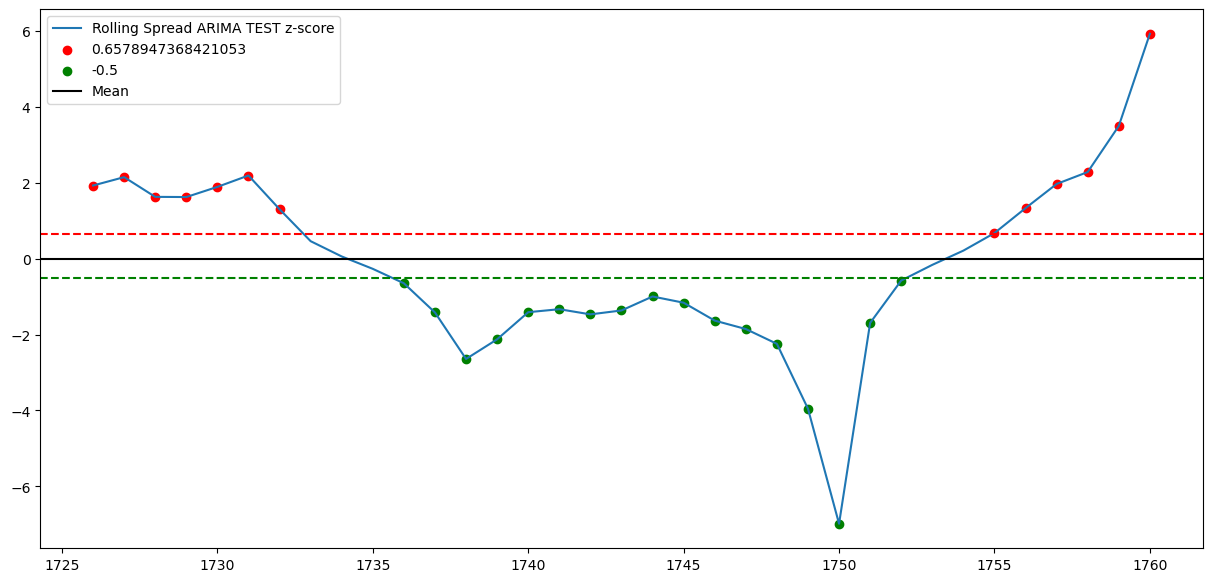

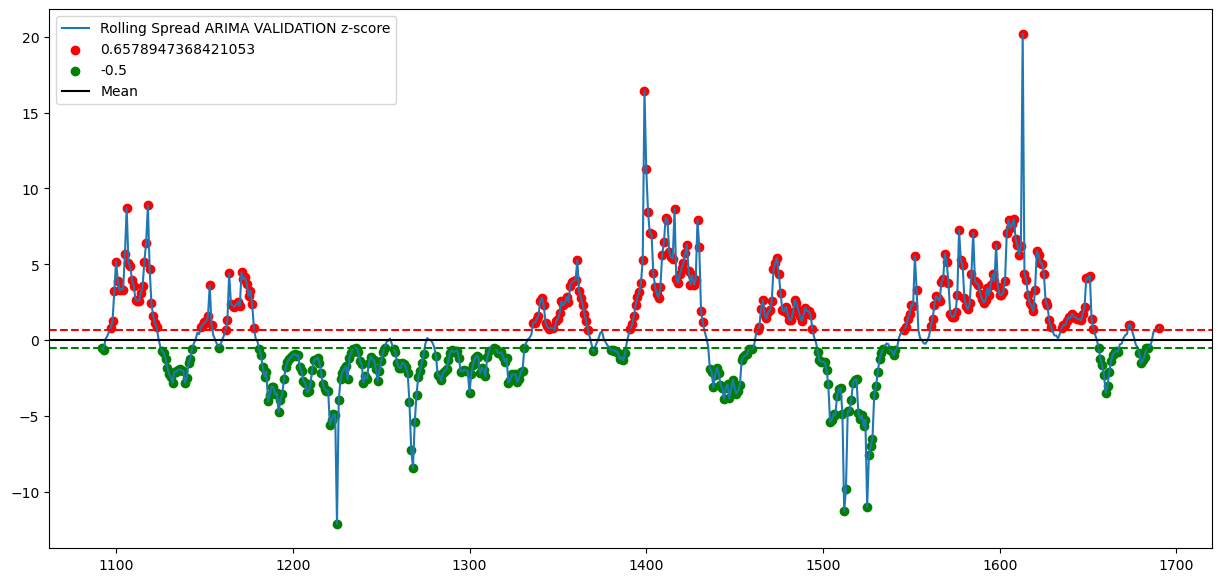

Optimal Parameters {'buy_threshold': -0.5, 'clear_threshold': 0.1111111111111111, 'sell_threshold': 0.6578947368421053, 'window1': 36, 'window2': 6}
Money on validation data 7807.378977018601
Money on test data 1200.4637621165784


In [32]:
byopt = bayesianOpt()
params = byopt.optimize(spread_ARIMA_val,S1_val,S2_val,param_grid,config_dict)
print(byopt.optimize_results["best_params"])
window1 = byopt.optimize_results["best_params"]["window1"]
window2 = byopt.optimize_results["best_params"]["window2"]
sell_threshold = byopt.optimize_results["best_params"]["sell_threshold"]
buy_threshold = byopt.optimize_results["best_params"]["buy_threshold"]
clear_threshold = byopt.optimize_results["best_params"]["clear_threshold"]

money_test = trade_strategy(S1_test,S2_test,spread_ARIMA_test,window1,window2,sell_threshold,buy_threshold,clear_threshold)
buy_signal_plots(spread_ARIMA_test,S1_test,S2_test,window1,window2,sell_threshold,buy_threshold,label="ARIMA TEST")

money_val = trade_strategy(S1_val,S2_val,spread_ARIMA_val,window1,window2,sell_threshold,buy_threshold,clear_threshold)
buy_signal_plots(spread_ARIMA_val,S1_val,S2_val,window1,window2,sell_threshold,buy_threshold,label="ARIMA VALIDATION")

print("Optimal Parameters",byopt.optimize_results["best_params"])
print("Money on validation data",money_val)
print("Money on test data",money_test)



# Trading Strategy using Dynamic Mode Decomposition

  0%|          | 0/150 [00:00<?, ?it/s]

{'buy_threshold': -0.6052631578947368, 'clear_threshold': 0.3333333333333333, 'sell_threshold': 0.7105263157894737, 'window1': 50, 'window2': 4}


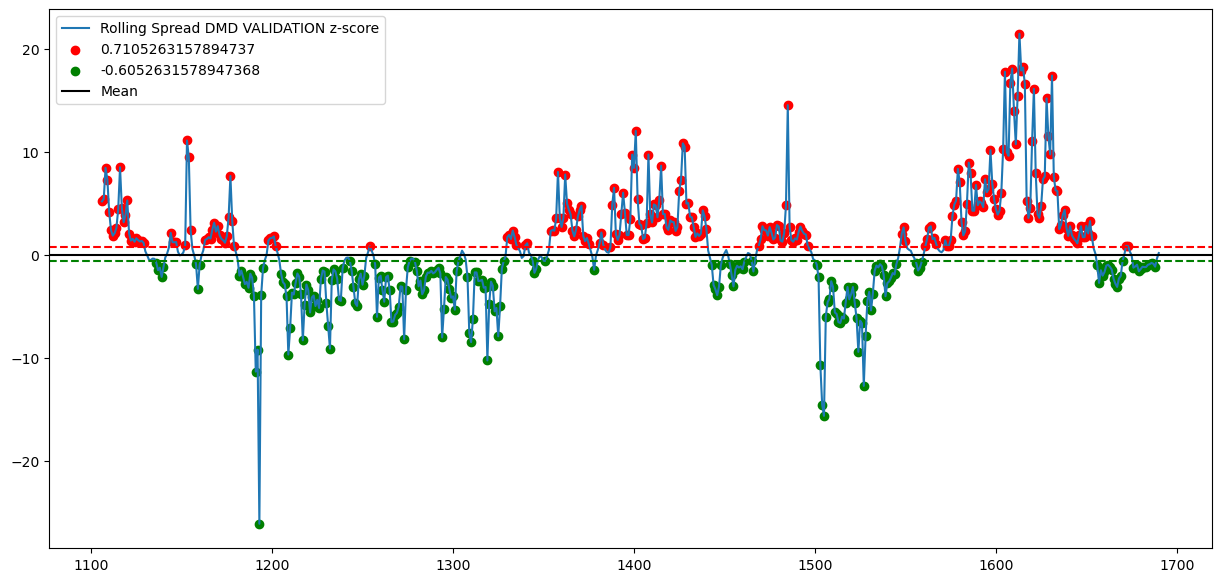

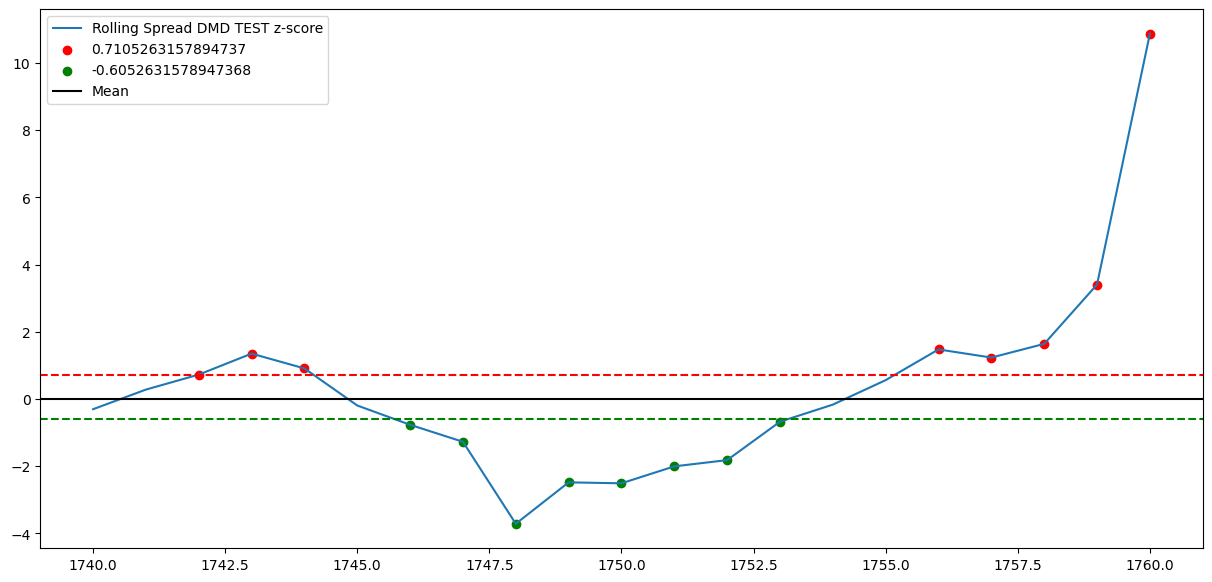

Optimal Parameters {'buy_threshold': -0.6052631578947368, 'clear_threshold': 0.3333333333333333, 'sell_threshold': 0.7105263157894737, 'window1': 50, 'window2': 4}
Money on validation data 9252.262295928811
Money on test data 47.089700472287404


In [33]:
byopt = bayesianOpt()
params = byopt.optimize(spread_DMD_val,S1_val,S2_val,param_grid,config_dict)
print(byopt.optimize_results["best_params"])
window1 = byopt.optimize_results["best_params"]["window1"]
window2 = byopt.optimize_results["best_params"]["window2"]
sell_threshold = byopt.optimize_results["best_params"]["sell_threshold"]
buy_threshold = byopt.optimize_results["best_params"]["buy_threshold"]
clear_threshold = byopt.optimize_results["best_params"]["clear_threshold"]

money_val = trade_strategy(S1_val,S2_val,spread_DMD_val,window1,window2,sell_threshold,buy_threshold,clear_threshold)
buy_signal_plots(spread_DMD_val,S1_val,S2_val,window1,window2,sell_threshold,buy_threshold,label="DMD VALIDATION")

money_test = trade_strategy(S1_test,S2_test,spread_DMD_test,window1,window2,sell_threshold,buy_threshold,clear_threshold)
buy_signal_plots(spread_DMD_test,S1_test,S2_test,window1,window2,sell_threshold,buy_threshold,label="DMD TEST")

print("Optimal Parameters",byopt.optimize_results["best_params"])
print("Money on validation data",money_val)
print("Money on test data",money_test)

# Parameter Initialization for ARIMA

In [34]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [35]:
result = adfuller(pm.data['Spread_Close'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.481059
p-value: 0.895660


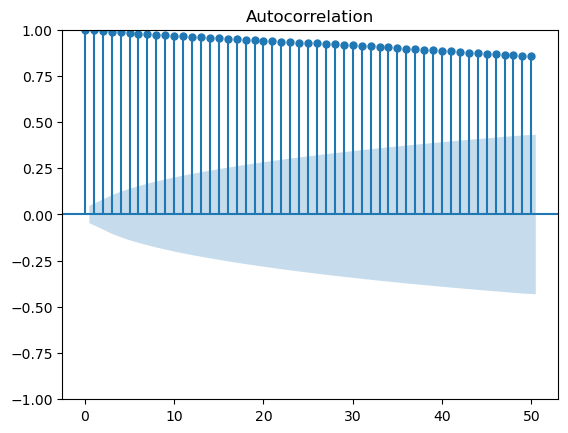

In [36]:
plot_acf(pm.data['Spread_Close'],lags=50)
plt.show()

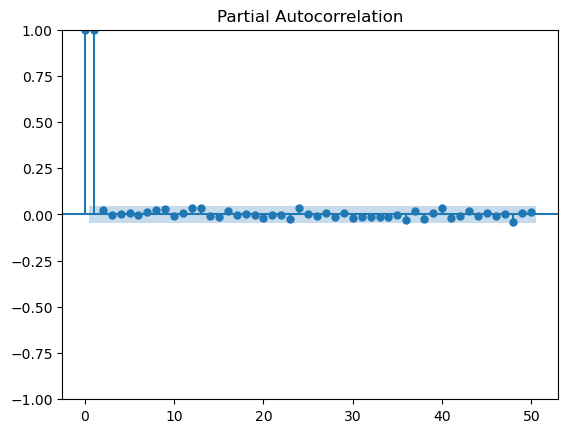

In [37]:
plot_pacf(pm.data['Spread_Close'],lags=50)
plt.show()

In [38]:
result = adfuller(pm.data['Spread_Close'].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -43.978758
p-value: 0.000000


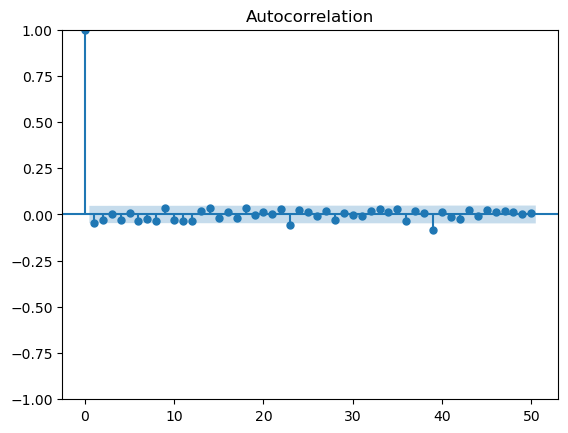

In [39]:
plot_acf(pm.data['Spread_Close'].diff().dropna(),lags=50)
plt.show()

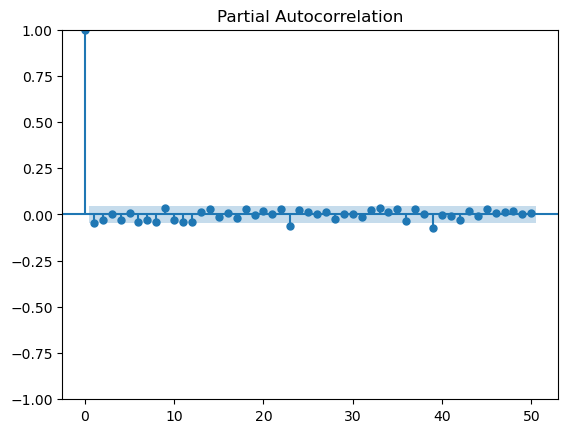

In [40]:
plot_pacf(pm.data['Spread_Close'].diff().dropna(),lags=50)
plt.show()

In [45]:
result = adfuller(pm.data['Spread_Close'].diff().dropna())
print('ADF Statistic: {:.6f}'.format(result[0]))
print('p-value: {:.10f}'.format(result[1]))  

ADF Statistic: -43.978758
p-value: 0.0000000000
